# 순환 신경망으로 IMDB 리뷰 분류하기

* 필요한 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras


#### 토큰에 부여되는 특수 정수
- 0: 패딩
- 1: 문장의 시작
- 2: 어휘 사전에 없는 토큰

## IMDB 리뷰 데이터셋

In [2]:
# 빈도수가 가장 많은 500개 데이터만 로드하기
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
# 훈련세트, 테스트 세트 크기 확인
train_input.shape, test_input.shape

((25000,), (25000,))

In [4]:
# 첫 번째 리뷰의 길이 출력
len(train_input[0])


218

In [5]:
# 두 번째 리뷰의 길이 출력
len(train_input[1])

189

In [6]:
# 첫 번째 리뷰에 담긴 내용과 레이블 확인
print(train_input[0])
print("-"*50)
print(train_target[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
--------------------------------------------------
1


In [7]:
# 타겟 데이터 확인 긍정:1  부정: 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [8]:
# 훈련 세트와 검증 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_input, train_target,
                                                                     test_size=0.2,
                                                                       random_state=42)

In [9]:
# 훈련 세트의 각 리뷰별 단어 길이 확인 및 평균 , 중간값 확인
print(X_train.shape, X_val.shape)

length = []
for each in X_train:
    length.append(len(each))

length[:20]

(20000,) (5000,)


[259,
 520,
 290,
 109,
 559,
 96,
 130,
 935,
 383,
 716,
 195,
 55,
 122,
 142,
 104,
 109,
 179,
 777,
 368,
 311]

In [12]:
#### 리스트 컨프리헨션으로 표현
length = np.array([len(each) for each in X_train])
length[:20]

array([259, 520, 290, 109, 559,  96, 130, 935, 383, 716, 195,  55, 122,
       142, 104, 109, 179, 777, 368, 311])

In [13]:
# 리뷰 길이 데이터의 분포 확인
np.mean(length), np.median(length)

(239.00925, 178.0)

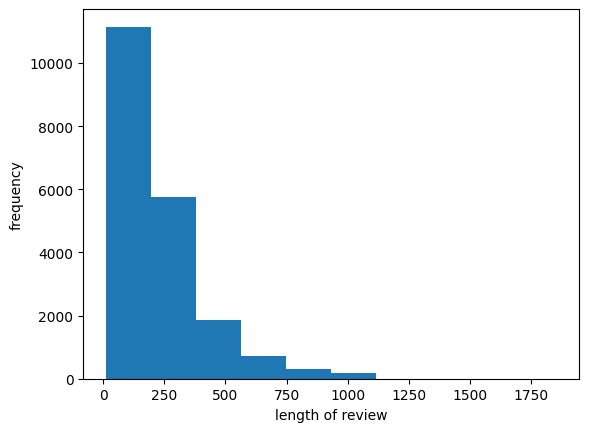

In [14]:
import matplotlib.pyplot as plt

plt.hist(length)
plt.xlabel('length of review')
plt.ylabel('frequency')
plt.show()

### 리뷰의 길이를 일정하게 조정 - pad_sequence()

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100)


In [16]:
train_seq.shape

(20000, 100)

In [17]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158])

In [18]:
print(X_train[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [19]:
val_seq = pad_sequences(X_val, maxlen=100)

# 순환 신경망 만들기

## 1) Model1 : One-Hot Encoding을 사용하여 RNN 입력 시퀀스 구성한 경우

In [20]:
# One-Hot Encoding
train_oh = keras.utils.to_categorical(train_seq)

In [21]:
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
#원핫 인코딩이 잘 된 상태
train_oh.shape

(20000, 100, 500)

In [23]:
train_oh[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [25]:
model = keras.Sequential([
    SimpleRNN(8, input_shape=(100, 500)),
    Dense(1, activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [27]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=rmsprop)

In [28]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('320.0.best_simpleRNN.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model.fit(train_oh, y_train, epochs=100, batch_size=64,
                validation_data= (val_oh, y_val),
                callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 22ms/step - loss: 0.6974 - accuracy: 0.5016 - val_loss: 0.6934 - val_accuracy: 0.5172
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6916 - accuracy: 0.5231 - val_loss: 0.6867 - val_accuracy: 0.5524
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6813 - accuracy: 0.5692 - val_loss: 0.6764 - val_accuracy: 0.5940
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6702 - accuracy: 0.6108 - val_loss: 0.6657 - val_accuracy: 0.6214
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6567 - accuracy: 0.6468 - val_loss: 0.6527 - val_accuracy: 0.6492
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6417 - accuracy: 0.6714 - val_loss: 0.6392 - val_accuracy: 0.6702
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6261 - accuracy: 0.6952 - val_loss: 0.6231 - val_accuracy:

In [29]:
model.save('320.0.best_simpleRNN.h5')

In [ ]:
model = tf.keras.models.load_model('320.0.best_simpleRNN.h5')

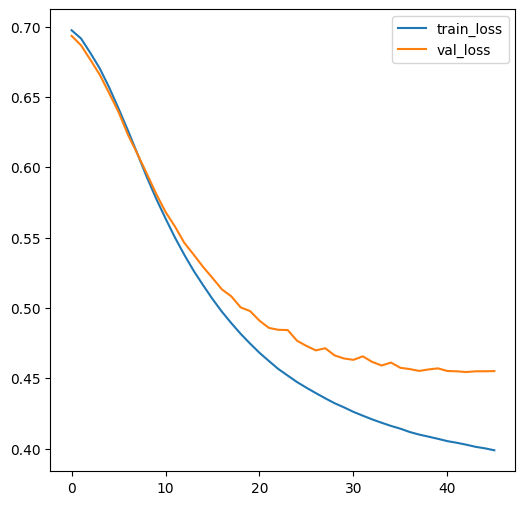

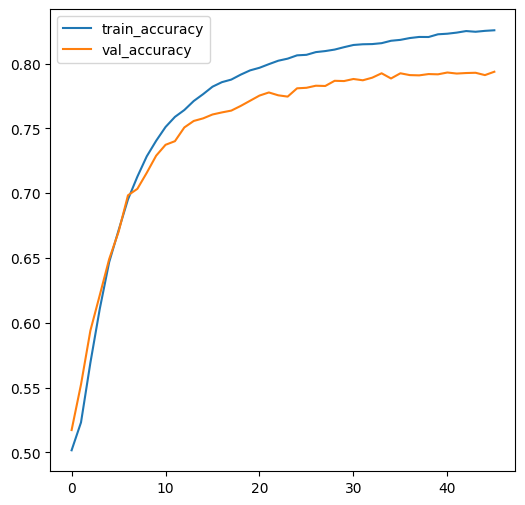

In [35]:
df = pd.DataFrame(hist.history)
plt.figure(figsize=(6, 6))
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.legend()
plt.show()

## Model2. 단어 임베딩을 사용하여 RNN 입력 시퀀스 구성한 경우
- 각각의 단어(토큰)를 고정된 크기의 실수 벡터로 변환
- keras.layers.Embedding 클래스 활용

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model_emb = Sequential([
    Embedding(500, 16, input_length=100),
    SimpleRNN(8),
    Dense(1, activation='sigmoid')
])

In [39]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=1e-4)
model_emb.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=rmsprop)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('320.0.best_embRNN.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model_emb.fit(train_seq, y_train, epochs=100, batch_size=64,
                validation_data= (val_seq, y_val),
                callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 13ms/step - loss: 0.6940 - accuracy: 0.5102 - val_loss: 0.6923 - val_accuracy: 0.5170
Epoch 2/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6888 - accuracy: 0.5406 - val_loss: 0.6891 - val_accuracy: 0.5372
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6834 - accuracy: 0.5688 - val_loss: 0.6847 - val_accuracy: 0.5534
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6746 - accuracy: 0.6033 - val_loss: 0.6705 - val_accuracy: 0.6062
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6358 - accuracy: 0.6843 - val_loss: 0.6207 - val_accuracy: 0.6990
Epoch 6/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6020 - accuracy: 0.7199 - val_loss: 0.5964 - val_accuracy: 0.7240
Epoch 7/100
313/313 [==============================] - 5s 15ms/step - loss: 0.5792 - accuracy: 0.7329 - val_loss: 0.5785 - val_accuracy:

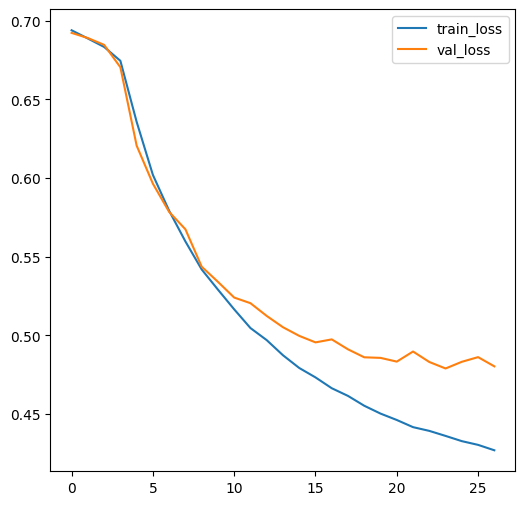

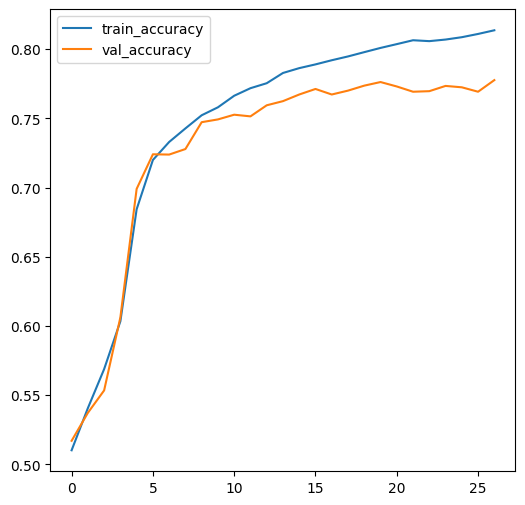

In [40]:
df = pd.DataFrame(hist.history)
plt.figure(figsize=(6, 6))
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.legend()
plt.show()

# LSTM RNN으로 IMDB  텍스트 분류

In [41]:
from keras.layers import LSTM

model_lstm = keras.Sequential([
    Embedding(500, 16, input_length=100),
    LSTM(8),
    Dense(1, activation='sigmoid')
])
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [42]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=1e-4)
model_lstm.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=rmsprop)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('320.0.best_lstmRNN.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model_lstm.fit(train_seq, y_train, epochs=100, batch_size=64,
                validation_data= (val_seq, y_val),
                callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 9s 23ms/step - loss: 0.6922 - accuracy: 0.5470 - val_loss: 0.6908 - val_accuracy: 0.6008
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6883 - accuracy: 0.6303 - val_loss: 0.6847 - val_accuracy: 0.6568
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6749 - accuracy: 0.6828 - val_loss: 0.6598 - val_accuracy: 0.7044
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6321 - accuracy: 0.7179 - val_loss: 0.6154 - val_accuracy: 0.7096
Epoch 5/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6010 - accuracy: 0.7200 - val_loss: 0.5959 - val_accuracy: 0.7124
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.5802 - accuracy: 0.7315 - val_loss: 0.5792 - val_accuracy: 0.7298
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.5599 - accuracy: 0.7477 - val_loss: 0.5647 - val_accuracy:

In [ ]:
df = pd.DataFrame(hist.history)
plt.figure(figsize=(6, 6))
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.legend()
plt.show()

## RNN 순환층에 DropOut 적용하기

In [43]:
from keras.layers import LSTM, Dropout

model_lstm_with_dropout = keras.Sequential([
    Embedding(500, 16, input_length=100),
    LSTM(8),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model_lstm_with_dropout.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [45]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=1e-4)
model_lstm_with_dropout.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=rmsprop)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('320.0.best_lstmRNN.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model_lstm_with_dropout.fit(train_seq, y_train, epochs=100, batch_size=64,
                validation_data= (val_seq, y_val),
                callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 47ms/step - loss: 0.4163 - accuracy: 0.8198 - val_loss: 0.4253 - val_accuracy: 0.8074
Epoch 2/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4162 - accuracy: 0.8200 - val_loss: 0.4265 - val_accuracy: 0.8026
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4151 - accuracy: 0.8210 - val_loss: 0.4259 - val_accuracy: 0.8058
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4152 - accuracy: 0.8210 - val_loss: 0.4245 - val_accuracy: 0.8042
Epoch 5/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4134 - accuracy: 0.8212 - val_loss: 0.4337 - val_accuracy: 0.7984
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4128 - accuracy: 0.8229 - val_loss: 0.4245 - val_accuracy: 0.8056
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.4128 - accuracy: 0.8214 - val_loss: 0.4266 - val_ac

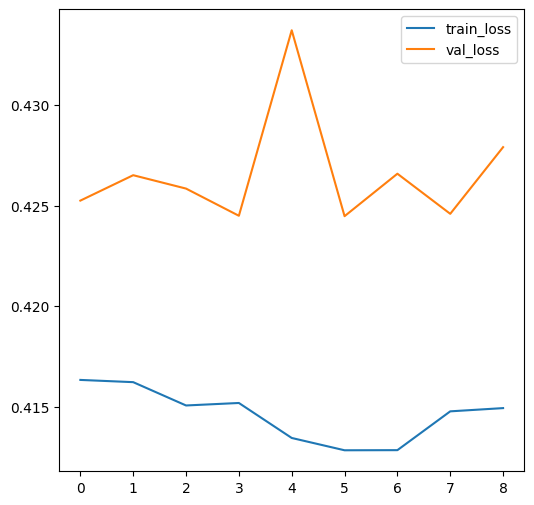

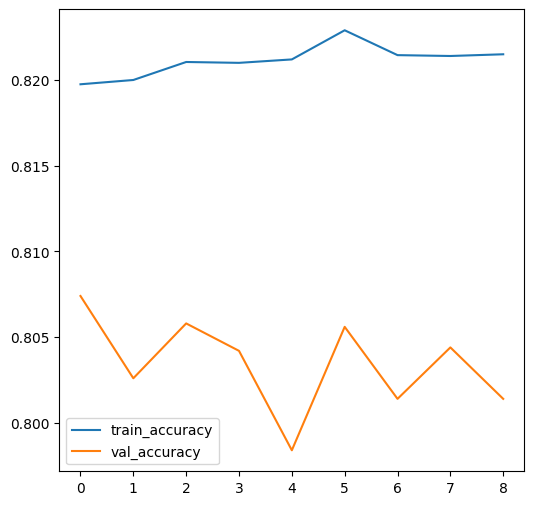

In [46]:
df = pd.DataFrame(hist.history)
plt.figure(figsize=(6, 6))
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.legend()
plt.show()

## 2개의 RNN층이 연결된 모델 구현하기

# GRU 모델 구현하기